In [1]:
import torch
from torch.nn import functional as F

In [2]:
image = torch.randn(480, 640).clamp(0, 1)

In [3]:
image

tensor([[0.0000, 1.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
        [0.0000, 0.9672, 0.0000,  ..., 0.0000, 0.0462, 1.0000],
        [0.0000, 0.0000, 1.0000,  ..., 1.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.8035, 1.0000],
        [0.0000, 0.4434, 0.0000,  ..., 1.0000, 0.0000, 0.4094],
        [0.6238, 0.0000, 0.1357,  ..., 0.0000, 1.0000, 1.0000]])

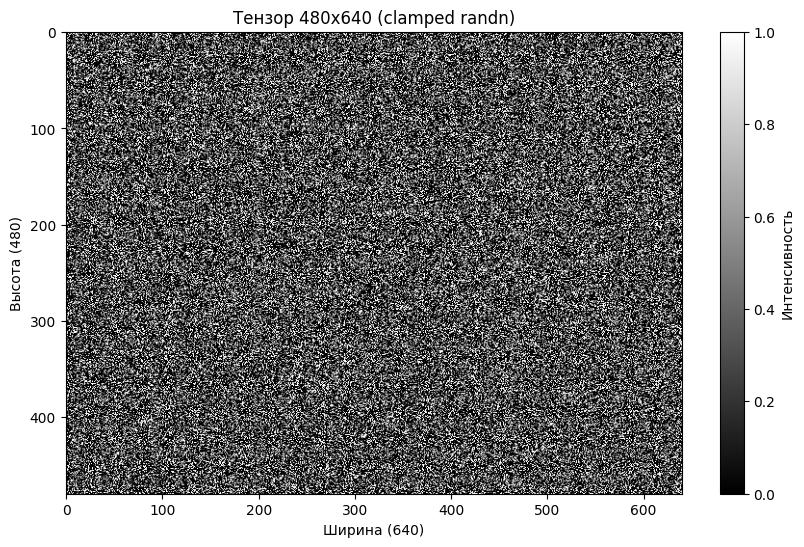

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(image.numpy(), cmap='gray')  # cmap='gray' для черно-белого
plt.colorbar(label='Интенсивность')
plt.title('Тензор 480x640 (clamped randn)')
plt.xlabel('Ширина (640)')
plt.ylabel('Высота (480)')
plt.show()

In [5]:
image

tensor([[0.0000, 1.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
        [0.0000, 0.9672, 0.0000,  ..., 0.0000, 0.0462, 1.0000],
        [0.0000, 0.0000, 1.0000,  ..., 1.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.8035, 1.0000],
        [0.0000, 0.4434, 0.0000,  ..., 1.0000, 0.0000, 0.4094],
        [0.6238, 0.0000, 0.1357,  ..., 0.0000, 1.0000, 1.0000]])

In [6]:
unfold = torch.nn.Unfold(kernel_size=20, stride=20, padding=0)

In [7]:
unfold

Unfold(kernel_size=20, dilation=1, padding=0, stride=20)

In [8]:
image = image.unsqueeze(0).unsqueeze(0)

In [9]:
image.shape

torch.Size([1, 1, 480, 640])

In [10]:
a = unfold(image)

In [11]:
a.shape

torch.Size([1, 400, 768])

In [12]:
a[0, :, 0]

tensor([0.0000, 1.0000, 0.0000, 0.6841, 0.7773, 0.0000, 1.0000, 0.2463, 0.0000,
        0.3727, 0.0000, 0.9281, 0.7194, 0.0223, 0.0000, 0.4394, 0.0000, 0.0000,
        0.0166, 0.0000, 0.0000, 0.9672, 0.0000, 0.3414, 0.0000, 0.9419, 0.0000,
        0.0000, 0.7424, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.8753, 0.2718,
        0.0000, 0.0000, 0.3553, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.3596,
        1.0000, 0.0000, 1.0000, 1.0000, 0.1131, 1.0000, 1.0000, 0.0000, 1.0000,
        0.0000, 1.0000, 0.9628, 0.0000, 0.3253, 0.6901, 0.2238, 0.0000, 0.2325,
        1.0000, 0.9790, 0.0000, 0.6042, 0.0083, 0.0000, 0.6810, 0.5784, 1.0000,
        0.3195, 0.0991, 0.0000, 0.0000, 0.0000, 0.3374, 0.0000, 0.0000, 0.3769,
        1.0000, 0.0000, 0.4497, 0.0000, 0.0000, 0.0000, 0.6379, 0.0000, 0.0000,
        0.0000, 1.0000, 1.0000, 0.6661, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        0.0597, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.3595,
        0.0000, 0.7210, 0.9943, 0.0000, 

In [13]:
image

tensor([[[[0.0000, 1.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
          [0.0000, 0.9672, 0.0000,  ..., 0.0000, 0.0462, 1.0000],
          [0.0000, 0.0000, 1.0000,  ..., 1.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.8035, 1.0000],
          [0.0000, 0.4434, 0.0000,  ..., 1.0000, 0.0000, 0.4094],
          [0.6238, 0.0000, 0.1357,  ..., 0.0000, 1.0000, 1.0000]]]])

In [14]:
patches_for_linear = a.permute(0, 2, 1)

In [15]:
patches_for_linear.shape

torch.Size([1, 768, 400])

In [16]:
patches_for_linear[0, 0, :]

tensor([0.0000, 1.0000, 0.0000, 0.6841, 0.7773, 0.0000, 1.0000, 0.2463, 0.0000,
        0.3727, 0.0000, 0.9281, 0.7194, 0.0223, 0.0000, 0.4394, 0.0000, 0.0000,
        0.0166, 0.0000, 0.0000, 0.9672, 0.0000, 0.3414, 0.0000, 0.9419, 0.0000,
        0.0000, 0.7424, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.8753, 0.2718,
        0.0000, 0.0000, 0.3553, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.3596,
        1.0000, 0.0000, 1.0000, 1.0000, 0.1131, 1.0000, 1.0000, 0.0000, 1.0000,
        0.0000, 1.0000, 0.9628, 0.0000, 0.3253, 0.6901, 0.2238, 0.0000, 0.2325,
        1.0000, 0.9790, 0.0000, 0.6042, 0.0083, 0.0000, 0.6810, 0.5784, 1.0000,
        0.3195, 0.0991, 0.0000, 0.0000, 0.0000, 0.3374, 0.0000, 0.0000, 0.3769,
        1.0000, 0.0000, 0.4497, 0.0000, 0.0000, 0.0000, 0.6379, 0.0000, 0.0000,
        0.0000, 1.0000, 1.0000, 0.6661, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        0.0597, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.3595,
        0.0000, 0.7210, 0.9943, 0.0000, 

In [20]:
import torch.nn as nn

In [18]:
class Encoder(torch.nn.Module):
    def __init__(self, path_dim):
        super().__init__()
        self.PATCH_DIM = path_dim
        self.w_emb = torch.nn.Parameter(torch.randn(400, self.PATCH_DIM))
    def make_embeddings(self, x):
        return x @ self.w_emb
    def forward(self, x):






In [19]:
enc = Encoder()
enc.w_emb.shape

torch.Size([400, 256])

In [20]:
enc.w_emb.grad

In [21]:
patches_for_linear.shape

torch.Size([1, 768, 400])

In [22]:
rez = enc.make_embeddings(patches_for_linear)

In [23]:
rez

tensor([[[-16.8088, -10.9057,  -3.2906,  ..., -21.4895,   4.8423,  15.0344],
         [ -6.3319,  -2.8732,   1.4009,  ...,   0.6500,  16.6772,  -5.1278],
         [-25.8177,  -1.6036,   3.0966,  ...,  -3.3826,   9.4281,   5.2966],
         ...,
         [-18.4596,  -8.6717,  13.6020,  ...,  -5.2121,   5.7097,   4.4605],
         [-34.1923,  -9.6868,   3.5519,  ...,  -6.2582,   6.2081,  -4.2633],
         [ -9.2173,  -4.8597,  -3.8279,  ...,  -5.3201,  16.4728, -11.7053]]],
       grad_fn=<UnsafeViewBackward0>)

In [24]:
rez.shape

torch.Size([1, 768, 256])

In [25]:
enc.w_emb.requires_grad

True

In [50]:
# SELF-ATTENTION

head_size = 128
path_dim = 256

key = nn.Linear(path_dim, head_size, bias=False)
query = nn.Linear(path_dim, head_size, bias=False)
value = nn.Linear(path_dim, head_size, bias=False)

k = key(rez) # (B, T, head_size)
q = query(rez) # (B, T, head_size)
v = value(rez) # (B, T, head_size)
wei = q @ k.transpose(-2, -1) # (B, T, T)

In [51]:
wei

tensor([[[ 261.6191,   49.8428,  183.4186,  ...,  143.4219,  147.7697,
           512.9714],
         [-397.8482, -431.0953,  157.2567,  ..., -140.2353,  588.3343,
           135.6612],
         [  42.2773,  622.2260,  522.6215,  ...,  157.8024,  -36.1227,
           387.3774],
         ...,
         [-155.7183,  237.9428,  163.4113,  ...,  464.8074,  -27.7145,
           194.9406],
         [ 239.2186,  459.7555,  284.1579,  ...,   18.6796,  237.5403,
           793.0219],
         [-294.4275,  134.5436,   58.7591,  ...,  311.5973, -417.1155,
           404.3599]]], grad_fn=<UnsafeViewBackward0>)

In [52]:
wei.shape

torch.Size([1, 768, 768])

In [53]:
wei = wei / (head_size ** 0.5)

In [54]:
softwei = F.softmax(wei, dim=-1)

In [55]:
softwei.shape

torch.Size([1, 768, 768])

In [56]:
softwei

tensor([[[2.9628e-38, 0.0000e+00, 2.9502e-41,  ..., 8.6040e-43,
          1.2626e-42, 1.3190e-28],
         [0.0000e+00, 0.0000e+00, 7.2142e-34,  ..., 2.8026e-45,
          2.5455e-17, 1.0696e-34],
         [8.3075e-38, 1.5195e-15, 2.2816e-19,  ..., 2.2599e-33,
          8.1275e-41, 1.4679e-24],
         ...,
         [0.0000e+00, 5.8289e-36, 8.0275e-39,  ..., 2.9795e-27,
          0.0000e+00, 1.3028e-37],
         [1.6370e-34, 4.7831e-26, 8.6920e-33,  ..., 5.6052e-43,
          1.4113e-34, 2.9693e-13],
         [0.0000e+00, 4.8600e-35, 5.9914e-38,  ..., 3.0417e-28,
          0.0000e+00, 1.1065e-24]]], grad_fn=<SoftmaxBackward0>)

In [57]:
softwei[0]

tensor([[2.9628e-38, 0.0000e+00, 2.9502e-41,  ..., 8.6040e-43, 1.2626e-42,
         1.3190e-28],
        [0.0000e+00, 0.0000e+00, 7.2142e-34,  ..., 2.8026e-45, 2.5455e-17,
         1.0696e-34],
        [8.3075e-38, 1.5195e-15, 2.2816e-19,  ..., 2.2599e-33, 8.1275e-41,
         1.4679e-24],
        ...,
        [0.0000e+00, 5.8289e-36, 8.0275e-39,  ..., 2.9795e-27, 0.0000e+00,
         1.3028e-37],
        [1.6370e-34, 4.7831e-26, 8.6920e-33,  ..., 5.6052e-43, 1.4113e-34,
         2.9693e-13],
        [0.0000e+00, 4.8600e-35, 5.9914e-38,  ..., 3.0417e-28, 0.0000e+00,
         1.1065e-24]], grad_fn=<SelectBackward0>)

In [58]:
out = softwei @ v

In [59]:
out

tensor([[[ 1.5014, -7.5755,  9.2698,  ...,  3.2234, 12.6427, -4.4231],
         [ 8.9713,  1.0862, -2.1187,  ..., -1.7622, -1.7315,  0.2908],
         [ 9.1538, -8.4370,  6.8591,  ..., -7.6954,  5.5872, -3.9582],
         ...,
         [-0.8308,  2.5764, -0.9567,  ...,  0.7733,  6.6364, -2.6625],
         [11.4723, -4.6565, -0.7541,  ...,  1.2113, -4.1133,  4.2721],
         [ 8.7738,  6.0302,  8.2542,  ..., -6.3693, -1.1621, -4.0227]]],
       grad_fn=<UnsafeViewBackward0>)

In [60]:
out.shape

torch.Size([1, 768, 128])

In [ ]:
class AttentionHead(nn.Module):
    def __init__(self, path_dim, head_size): # patch dim - dim of embedding space, head_size - dim of head space
        self.key = nn.Linear(path_dim, head_size, bias=False)
        self.query = nn.Linear(path_dim, head_size, bias=False)
        self.value = nn.Linear(path_dim, head_size, bias=False)
    def forward(self, x):
        B, T, C = x.shape #(batch, count of elements, count of features
        k = self.key(rez) # (B, T, head_size)
        q = self.query(rez) # (B, T, head_size)
        v = self.value(rez) # (B, T, head_size)
        wei = (q @ k.transpose(-2, -1) / (C ** 0.5)) # (B, T, T)
        softwei = F.softmax(wei, dim=-1)
        out = softwei @ v
        return out


In [61]:
aa = torch.tensor([1, 2])
bb = torch.tensor([3, 4])
cc = torch.cat([aa, bb], dim=-1)

In [62]:
cc

tensor([1, 2, 3, 4])

In [18]:
patches_for_linear.shape

torch.Size([1, 768, 400])

In [21]:
class AttentionHead(nn.Module):
    def __init__(self): # patch dim - dim of embedding space, head_size - dim of head space
        super().__init__()
        self.key = nn.Linear(256, 32, bias=False)
        self.query = nn.Linear(256, 32, bias=False)
        self.value = nn.Linear(256, 32, bias=False)
    def forward(self, x):
        B, T, C = x.shape #(batch, count of elements, count of features)
        k = self.key(x) # (B, T, head_size)
        q = self.query(x) # (B, T, head_size)
        v = self.value(x) # (B, T, head_size)
        wei = (q @ k.transpose(-2, -1) / (C ** 0.5)) # (B, T, T)
        softwei = F.softmax(wei, dim=-1)
        out = softwei @ v
        return out # (B, T, head_size)